In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

In [180]:
# Loading datasets
curr_dir = os.getcwd()
x_train = pd.read_csv(curr_dir+ r'\data_digits_8_vs_9_noisy\x_train.csv')
y_train = pd.read_csv(curr_dir+ r'\data_digits_8_vs_9_noisy\y_train.csv')
x_test = pd.read_csv(curr_dir+ r'\data_digits_8_vs_9_noisy\x_test.csv')
y_test = pd.read_csv(curr_dir+ r'\data_digits_8_vs_9_noisy\y_test.csv')

arange = np.arange(1,41)


C:\Users\jfoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\jfoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\jfoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\jfoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\jfoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarn

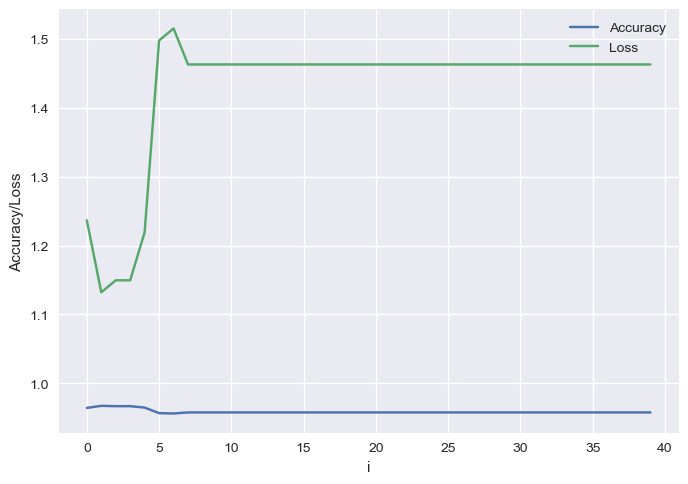

In [12]:
1.1 

#Train model
accuracy  = []
logistic_loss = []
coefficient = []

for i in arange:
    reg = LogisticRegression(solver='liblinear',max_iter=i)
    reg.fit(x_train, y_train['is_9'])
    
    y_pred = reg.predict(x_test)
    
    score = reg.score(x_test,y_test['is_9'])
    loss = sk.metrics.log_loss(y_test,y_pred)
    coef = reg.coef_.flat[0]
        
    accuracy.append(score)
    logistic_loss.append(loss)
    coefficient.append(coef)
    
#Plot results
plt.xlabel('i');
plt.ylabel('Accuracy/Loss');
plt.plot(accuracy, label="Accuracy")
plt.plot(logistic_loss, label="Loss")
plt.legend()
plt.show()


In [3]:
#Discussion of 1.1 results


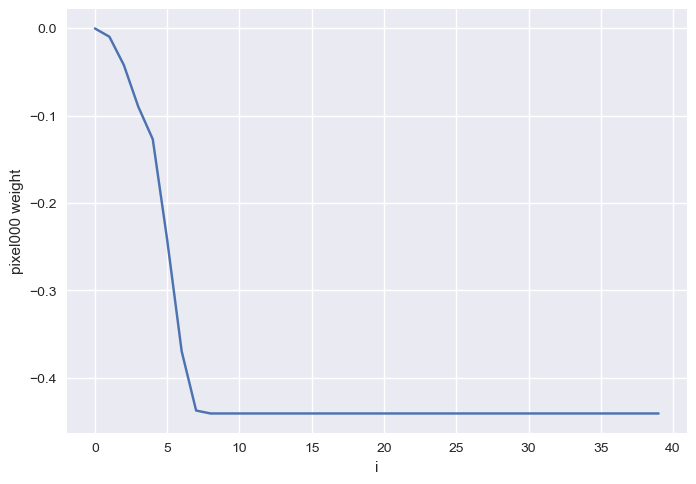

In [181]:
1.2

#Plot results
plt.xlabel('i');
plt.ylabel('pixel000 weight');
plt.plot(coefficient)
plt.show()


In [96]:
#Discussion of 1.2 results


In [127]:
1.3
C_grid = np.logspace(-9,6,31)

accuracy = []
log_loss = []

for C in C_grid:
    reg = LogisticRegression(solver='liblinear', C=C)
    reg.fit(x_train, y_train['is_9'])
    
    y_pred = reg.predict(x_test)
    
    score = reg.score(x_test,y_test['is_9'])
    loss = sk.metrics.log_loss(y_test['is_9'],y_pred)
    
    accuracy.append(score)
    log_loss.append(loss)

df = pd.DataFrame({"C": np.logspace(-9,6,31), "Accuracy": accuracy, "Log Loss":log_loss})
#print(df)

min_loss = df['Log Loss'].min()
row = df[df['Log Loss'] == min_loss]
print("Least loss on test data found at below values:")
print(row)

reg = LogisticRegression(solver='liblinear', C=0.1)
reg.fit(x_train, y_train['is_9'])
    
y_pred = reg.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(data=cm, columns=[0,1], index=[0,1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'
print(cm_df)

Least loss on test data found at below values:
      C  Accuracy  Log Loss
16  0.1  0.967726  1.114729
Predicted    0    1
True               
0          942   32
1           32  977


In [210]:
1.4

reg = LogisticRegression(solver='liblinear', C=0.1)
reg.fit(x_train, y_train['is_9'])
    
y_pred = reg.predict(x_test)

image_df = pd.DataFrame({"Y Test": y_test['is_9'], "Y Pred": y_pred})
wrong = image_df.loc[(image_df["Y Test"] != image_df["Y Pred"])]

false_pos = image_df.loc[(image_df["Y Test"] == 0) & (image_df["Y Pred"] == 1)].head(9)
false_neg = image_df.loc[(image_df["Y Test"] == 1) & (image_df["Y Pred"] == 0)].head(9)

print("False Positives:")
print(false_pos)
print(" ")
print("False Negatives:")
print(false_neg)

False Positives:
     Y Test  Y Pred
69        0       1
77        0       1
156       0       1
174       0       1
219       0       1
290       0       1
344       0       1
352       0       1
355       0       1
 
False Negatives:
     Y Test  Y Pred
39        1       0
56        1       0
79        1       0
206       1       0
229       1       0
294       1       0
335       1       0
376       1       0
407       1       0


False Positive Examples


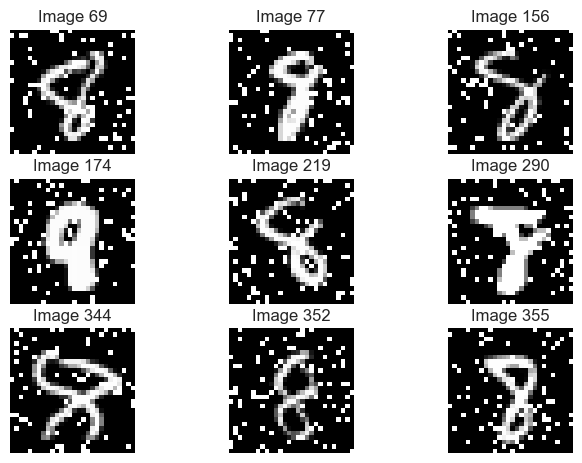

The model appears to misclassify 8's as 9's when one of the two circles in an 8 is either incomplete as in images 156 and 174 or there is a signficant size difference between them such as in images 69 and 355.
 
False Negative Examples


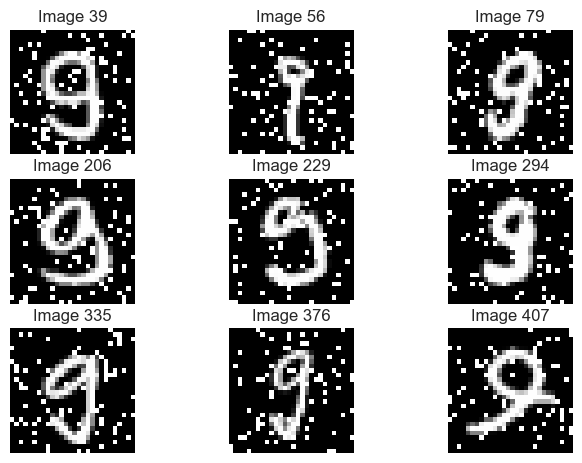

The model appears to misclassify 8's as 9's when one of the two circles in an 8 is either incomplete as in images 156 and 174 or there is a signficant size difference between them such as in images 69 and 355.


In [254]:
false_pos_list = [69,77,156,174,219,290,344,352,355]
false_neg_list = [39,56,79,206,229,294,335,376,407]

print("False Positive Examples")
fig, axs = plt.subplots(3,3, sharey=True)

axs[0,0].imshow(np.array(x_test.iloc[69]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[0,0].set_title("Image 69")
axs[0,0].axis('off')

axs[0,1].imshow(np.array(x_test.iloc[77]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[0,1].set_title("Image 77")
axs[0,1].axis('off')

axs[0,2].imshow(np.array(x_test.iloc[156]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[0,2].set_title("Image 156")
axs[0,2].axis('off')


axs[1,0].imshow(np.array(x_test.iloc[174]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[1,0].set_title("Image 174")
axs[1,0].axis('off')


axs[1,1].imshow(np.array(x_test.iloc[219]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[1,1].set_title("Image 219")
axs[1,1].axis('off')


axs[1,2].imshow(np.array(x_test.iloc[290]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[1,2].set_title("Image 290")
axs[1,2].axis('off')


axs[2,0].imshow(np.array(x_test.iloc[344]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[2,0].set_title("Image 344")
axs[2,0].axis('off')


axs[2,1].imshow(np.array(x_test.iloc[352]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[2,1].set_title("Image 352")
axs[2,1].axis('off')


axs[2,2].imshow(np.array(x_test.iloc[355]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[2,2].set_title("Image 355")
axs[2,2].axis('off')


plt.show()
print("The model appears to misclassify 8's as 9's when one of the two circles in an 8 is either incomplete as in images 156 and 174 or there is a signficant size difference between them such as in images 69 and 355.")
print(" ")
print("False Negative Examples")
fig, axs = plt.subplots(3,3, sharey=True)

axs[0,0].imshow(np.array(x_test.iloc[39]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[0,0].set_title("Image 39")
axs[0,0].axis('off')

axs[0,1].imshow(np.array(x_test.iloc[56]).reshape(28,28), cmap='gray', vmin=0, vmax=1)
axs[0,1].set_title("Image 56")
axs[0,1].axis('off')

axs[0,2].imshow(np.array(x_test.iloc[79]).reshape(28,28), cmap='gray',vmin=0, vmax=1)
axs[0,2].set_title("Image 79")
axs[0,2].axis('off')

axs[1,0].imshow(np.array(x_test.iloc[206]).reshape(28,28),cmap='gray', vmin=0, vmax=1)
axs[1,0].set_title("Image 206")
axs[1,0].axis('off')

axs[1,1].imshow(np.array(x_test.iloc[229]).reshape(28,28), cmap='gray',vmin=0, vmax=1)
axs[1,1].set_title("Image 229")
axs[1,1].axis('off')

axs[1,2].imshow(np.array(x_test.iloc[294]).reshape(28,28),cmap='gray', vmin=0, vmax=1)
axs[1,2].set_title("Image 294")
axs[1,2].axis('off')

axs[2,0].imshow(np.array(x_test.iloc[335]).reshape(28,28), cmap='gray',vmin=0, vmax=1)
axs[2,0].set_title("Image 335")
axs[2,0].axis('off')

axs[2,1].imshow(np.array(x_test.iloc[376]).reshape(28,28),cmap='gray', vmin=0, vmax=1)
axs[2,1].set_title("Image 376")
axs[2,1].axis('off')

axs[2,2].imshow(np.array(x_test.iloc[407]).reshape(28,28),cmap='gray', vmin=0, vmax=1)
axs[2,2].set_title("Image 407")
axs[2,2].axis('off')


plt.show()
print("The model appears to misclassify 8's as 9's when one of the two circles in an 8 is either incomplete as in images 156 and 174 or there is a signficant size difference between them such as in images 69 and 355.")

1.5
Description: Red pixels correspond to negative numbers while blue pixels correspond to positive. Because the shape of an 8 has a lower loop and 9 does not, the lower pixels appear to more strongly correspond with an 8.


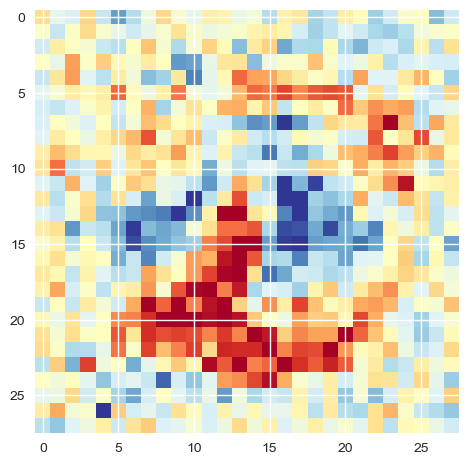

In [259]:
print("1.5")
result = np.reshape(reg.coef_,(28,28))
plt.imshow(result, cmap='RdYlBu',vmin=-0.5,vmax=0.5)
print("Description: Red pixels correspond to negative numbers while blue pixels correspond to positive. Because the shape of an 8 has a lower loop and 9 does not, the lower pixels appear to more strongly correspond with an 8.")


In [260]:
2
# Loading datasets
curr_dir = os.getcwd()
x_train = pd.read_csv(curr_dir+ r'\data_trouser_dress\troudress_train_x.csv')
y_train = pd.read_csv(curr_dir+ r'\data_trouser_dress\troudress_train_y.csv')
x_test = pd.read_csv(curr_dir+ r'\data_trouser_dress\troudress_test_x.csv')
